In [15]:
import json
with open("/home/klemen/luxonis/models_temp_output/temp_output/test_batch.json") as f:
    data = json.load(f)

In [16]:
import torch
import numpy as np

inputs = torch.tensor(np.array(data["inputs"]))
inputs.shape

torch.Size([32, 3, 512, 512])

In [24]:
outputs = torch.load("/home/klemen/luxonis/models_temp_output/temp_output/output_batch.pt")
outputs.shape

torch.Size([32, 1, 512, 512])

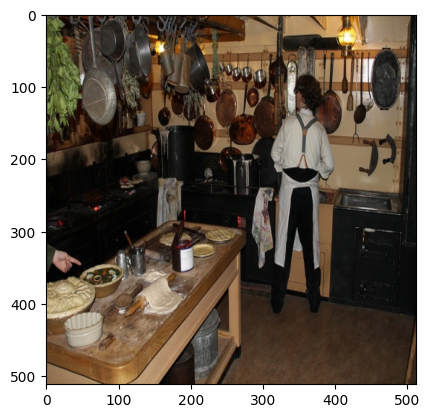

In [18]:
from luxonis_train.utils.visualization import *
import matplotlib.pyplot as plt

img = unnormalize(inputs[0], to_uint8=True)
img_outputs = torch_to_cv2(img, to_rgb=False)
plt.imshow(img_outputs)
plt.show()

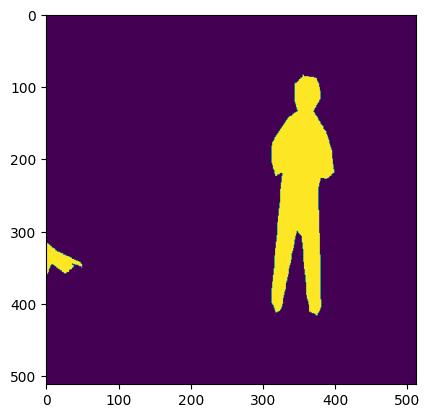

In [23]:
masks_label = torch.tensor(np.array(data["labels"]["segmentation"]))
mask_label = masks_label[0]
mask_out = torch_to_cv2(mask_label, to_rgb=False)
plt.imshow(mask_out)
plt.show()

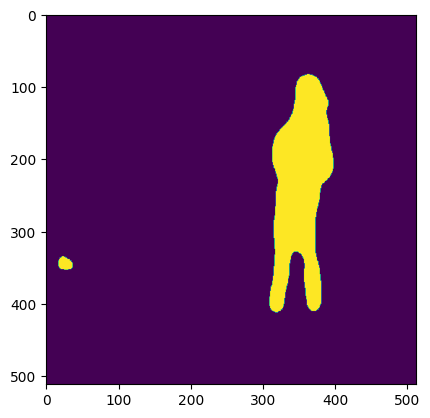

In [33]:
output = torch.sigmoid(outputs[0]) > 0.5
output_out = torch_to_cv2(output, to_rgb=False)
plt.imshow(output_out)
plt.show()

In [34]:
print(mask_label.shape, mask_label.min(), mask_label.max())
print(output.shape, output.min(), output.max())

torch.Size([1, 512, 512]) tensor(0., dtype=torch.float64) tensor(1., dtype=torch.float64)
torch.Size([1, 512, 512]) tensor(False, device='cuda:0') tensor(True, device='cuda:0')


In [90]:
test_label = torch.argmax(masks_label, dim=1, keepdim=True)
print(test_label.shape)

out_fix = outputs.clone() #torch.squeeze(outputs, dim=1)
print(out_fix.shape)


torch.Size([1, 1, 1, 1])
torch.Size([32, 1, 512, 512])


In [91]:
print(masks_label.shape, masks_label[0].max())
print(test_label.shape, test_label[0].max())

torch.Size([32, 1, 512, 512]) tensor(1., dtype=torch.float64)
torch.Size([1, 1, 1, 1]) tensor(43363)


In [102]:
import torchmetrics
acc = torchmetrics.Accuracy(task="binary", num_classes=1, ignore_index=0)
jaccard = torchmetrics.JaccardIndex(task="binary", num_classes=1, ignore_index=0)

In [103]:
print(acc(out_fix.to("cpu"), masks_label.to("cpu")))
print(jaccard(out_fix.to("cpu"), masks_label.to("cpu")))

tensor(0.8903)
tensor(0.8903)
